# Fair Division of Indivisible Goods

This is a Jupyter Notebook coming along with the chapter 
* Chapter 12 (Handbook of Computational Social Choice)

This notebook was used as part of the course of :
* The COST Summer School Lecture on Fair Division of Indivisible Items (San Sebastian, July 2016)
* COCOMA: Master ANDROIDE course at Sorbonne Université, 2016-2022

This version: 10-01-2022

## 1. Defining MARA problems

By importing the module `problem`, we can define fair division problems, by specifying a number of agents, a number of resources, and a type of "culture" to draw the preferences from. 

You can either:
* define a **centralized** MARA problem (all the resources are initially held by agent 0, who plays in this case the role of the auctioneer -- and counts as an agent)
* define a **decentralized** MARA problem (resources are initially randomly allocated)

You can also select the method to generate utilities: 
* **uniform**: utilities for each resource is drawn uniformly at random from 1 to 100
* **normalized**: utilities are normalized in [0,1]
* **Borda** utilities (worst resource valued 1, and so on, best one m)
* **empty**: leaves utilites undefined. You can later use p.setUtilities() to set utilities as you wish for a problem p. 

In [1]:
!pip install pulp

You should consider upgrading via the 'D:\Users\maria\AppData\Local\Programs\Python\Python37-32\python.exe -m pip install --upgrade pip' command.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [4]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/ColabNotebooks/fairdiv-indivisible-items-master/fairdiv-indivisible-items-master')

In [5]:
from problem import Problem


In [6]:
p1 = Problem(3,4,'borda',centralized=True)
print(p1)

agent 1{'r0': 4, 'r1': 1, 'r2': 2, 'r3': 3}
agent 2{'r0': 2, 'r1': 3, 'r2': 4, 'r3': 1}



Printing the allocation allows to see which agent holds which resource, and the current utility of each agent. 

In [7]:
print(p1.printAllocation())


auctioneer            ['r0', 'r1', 'r2', 'r3']	
agent  1                                 []	 0
agent  2                                 []	 0



It is also possible to set the allocation by hand, by using the setAllocation method. The allocation is specified as a boolean array. 

In [8]:
p1.setAllocation([[0,0,0,0],[1,1,0,0],[0,0,1,1]])

In [9]:
print(p1.printAllocation())

auctioneer                                  []	
agent  1                       ['r0', 'r1']	 5
agent  2                       ['r2', 'r3']	 5



A problem also handles an (undirected) **visibility graph** among agents. Note that in the centalized case, agent 0 is isolated from the rest (his utility is irrelevant), while all the other agents are by default connected. 

In [10]:
print (p1.visibility_graph)

{0: [], 1: [2], 2: [1]}


In [11]:
p1.setVisibilityGraph({0:[],1:[],2:[]})

No one sees anyone now...

### Example of the course

In [12]:
p3 = Problem(4,6,'empty', centralized=True)
p3.setUtilities(
[{'r0':0,'r1':0,'r2':0,'r3':0,'r4':0,'r5':0},\
{'r0':1,'r1':2,'r2':5,'r3':3,'r4':7,'r5':2},\
{'r0':2,'r1':6,'r2':8,'r3':1,'r4':1,'r5':2},\
{'r0':5,'r1':4,'r2':4,'r3':3,'r4':2,'r5':2}]
)
print (p3)
print (p3.printAllocation())

agent 1{'r0': 1, 'r1': 2, 'r2': 5, 'r3': 3, 'r4': 7, 'r5': 2}
agent 2{'r0': 2, 'r1': 6, 'r2': 8, 'r3': 1, 'r4': 1, 'r5': 2}
agent 3{'r0': 5, 'r1': 4, 'r2': 4, 'r3': 3, 'r4': 2, 'r5': 2}

auctioneer ['r0', 'r1', 'r2', 'r3', 'r4', 'r5']	
agent  1                                 []	 0
agent  2                                 []	 0
agent  3                                 []	 0



## 2. Fairness measures

The module `fairness_measures` provides a number of fairness measures for a given allocation: 
* proportionality
* egalitarian social welfare
* various notions of envy

In [13]:
import fairness_measures

In [14]:
p2 = Problem(3,6,'normalized',centralized=False)
print(p2)

agent 0{'r0': 0.2, 'r1': 0.259, 'r2': 0.337, 'r3': 0.086, 'r4': 0.031, 'r5': 0.086}
agent 1{'r0': 0.004, 'r1': 0.314, 'r2': 0.186, 'r3': 0.096, 'r4': 0.282, 'r5': 0.118}
agent 2{'r0': 0.177, 'r1': 0.057, 'r2': 0.294, 'r3': 0.174, 'r4': 0.114, 'r5': 0.184}



In [15]:
print(p2.printAllocation())

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
agent  0                             ['r4']	0.031
agent  1           ['r0', 'r1', 'r2', 'r5']	0.622
agent  2                             ['r3']	0.174



We can check various fairness properties...

In [16]:
print(fairness_measures.isProportional(p2))

False


In [17]:
print(fairness_measures.egalitarianSW(p2))

0.031


... and build the envy matrix from which several measures can be obtained. 

In [18]:
em2 = fairness_measures.envyMatrix(p2)
print(em2)
print("There are ", fairness_measures.nbEnviousAgents(em2), " envious agents")
print("The maximum envy among two agents is ", fairness_measures.maxEnvy(em2))

[[0.    0.851 0.055]
 [0.    0.    0.   ]
 [0.    0.538 0.   ]]
There are  2  envious agents
The maximum envy among two agents is  0.851


In [19]:
print(fairness_measures.isEnvyFree(em2))

False


In [20]:
em1 = fairness_measures.envyMatrix(p1)
print(fairness_measures.isEnvyFree(em1))

True


In [21]:
p1.setVisibilityGraph({0:[],1:[2],2:[1]})
em1 = fairness_measures.envyMatrix(p1)
print(fairness_measures.isEnvyFree(em1))

True


### Question 1

Create an instance involving 3 agents and 4 resources, with the following  utilities for the ressources : 
* agent 0: 6, 6, 1, 7
* agent 1: 1, 3, 9, 7
* agent 2: 8, 0, 4, 8

Find allocations which satisfies : 
* proportionality
* envy-freeness
* maximizes egalitarian social welfare
* maximizes utilitarian social welfare
* maximizes the Nash product

In [22]:
p1 = Problem(4,4,'empty', centralized=True)
p1.setUtilities(
[{'r0':0,'r1':0,'r2':0,'r3':0},\
{'r0':6,'r1':6,'r2':1,'r3':7},\
{'r0':1,'r1':3,'r2':9,'r3':7},\
{'r0':8,'r1':0,'r2':4,'r3':8}]
)
print (p1)
print (p1.printAllocation())

agent 1{'r0': 6, 'r1': 6, 'r2': 1, 'r3': 7}
agent 2{'r0': 1, 'r1': 3, 'r2': 9, 'r3': 7}
agent 3{'r0': 8, 'r1': 0, 'r2': 4, 'r3': 8}

auctioneer            ['r0', 'r1', 'r2', 'r3']	
agent  1                                 []	 0
agent  2                                 []	 0
agent  3                                 []	 0



Proportionality

In [23]:
p1.setAllocation([[0,0,0,0],[0,1,1,0],[0,0,0,1],[1,0,0,0]])
print(p1.printAllocation())
print(fairness_measures.isProportional(p1))

auctioneer                                  []	
agent  1                       ['r1', 'r2']	 7
agent  2                             ['r3']	 7
agent  3                             ['r0']	 8

True


Envy-freeness

In [24]:
p1.setAllocation([[0,0,0,0],[1,1,0,0],[0,0,1,0],[0,0,0,1]])
#p1.setAllocation([[0,0,0,0],[0,0,0,1],[0,1,1,0],[1,0,0,0]])
print(p1.printAllocation())
em1 = fairness_measures.envyMatrix(p1)
print(em1)
print(fairness_measures.isEnvyFree(em1))

auctioneer                                  []	
agent  1                       ['r0', 'r1']	12
agent  2                             ['r2']	 9
agent  3                             ['r3']	 8

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
True


ESW

In [25]:
p1.setAllocation([[0,0,0,0],[0,1,0,1],[0,0,1,0],[1,0,0,0]])
print(p1.printAllocation())

auctioneer                                  []	
agent  1                       ['r1', 'r3']	13
agent  2                             ['r2']	 9
agent  3                             ['r0']	 8



In [26]:
import mipsolving

print(mipsolving.assignmentLP(p1,verbose=True))

d:\users\maria\appdata\local\programs\python\python37-32\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


agent  1  gets resource r1
agent  1  gets resource r3
agent  2  gets resource r2
agent  3  gets resource r0
8.0


USW

In [27]:
p1.setAllocation([[0,0,0,0],[0,1,0,0],[0,0,1,0],[1,0,0,1]])
print(p1.printAllocation())

auctioneer                                  []	
agent  1                             ['r1']	 6
agent  2                             ['r2']	 9
agent  3                       ['r0', 'r3']	16



Nash

In [28]:
p1.setAllocation([[0,0,0,0],[0,1,0,1],[0,0,1,0],[1,0,0,0]])
print(p1.printAllocation())

auctioneer                                  []	
agent  1                       ['r1', 'r3']	13
agent  2                             ['r2']	 9
agent  3                             ['r0']	 8



### Question 2

There are a few missing notions though. Code functions which returns:
* whether the allocation is envy-free up to **one** or **any** good
* whether the allocation is proportional up to **one** or **any** good
Test whether you can find a counter-example to the fact that EFX does not imply PROPX. 

Another missing notion is Competitive Equilibrium with equal income. Code functions which: 
* for a problem, given an allocation and a price vector, returns whether this allocation is CEEI
* for a problem, given a price vector, checks whether there exists an allocation in CEEI
* for a a problem, checks whether there exists a pair of price vector and allocation in CEEI

In [29]:
import copy

In [30]:
def EF1(p):
  '''
  Check if the allocation is envy-free up to one good
  @p : an allocation problem
  Returns True or False
  '''

  em = fairness_measures.envyMatrix(p)
  if fairness_measures.isEnvyFree(em):
    # EF, not EFX
    return True

  else:
      for envious_agent in range(len(em)):
          for envied_agent in range(len(em[envious_agent])):

              if em[envious_agent][envied_agent] > 0:
                  resources = p.agent[envied_agent].hold.copy()

                  for r in resources:
                      p.agent[envied_agent].giveItem(r)                   
                      m = fairness_measures.envyMatrix(p)
                      p.agent[envied_agent].getItem(r)

                      # Check if envious_agent is still envious
                      if not m[envious_agent][envied_agent] > 0:
                        break
                      elif r == resources[-1]:
                          return False
  return True

In [31]:
def EFX(p):
  '''
  Check if the allocation is envy-free up to any good
  @p : an allocation problem
  Returns True or False
  '''

  em = fairness_measures.envyMatrix(p)
  if fairness_measures.isEnvyFree(em):
    # EF, not EFX
    return True

  else:
      for envious_agent in range(len(em)):
          for envied_agent in range(len(em[envious_agent])):

              if em[envious_agent][envied_agent] > 0:
                  ressources = p.agent[envied_agent].hold.copy()

                  for r in ressources:
                      p.agent[envied_agent].giveItem(r)                   
                      m = fairness_measures.envyMatrix(p)

                      # Check if envious_agent is still envious
                      if(not fairness_measures.isEnvyFree(m)):
                          return False
                      p.agent[envied_agent].getItem(r)
  return True

In [32]:
p1.setAllocation([[0,0,0,0],[0,1,0,1],[0,0,1,0],[1,0,0,0]])
print(EFX(p1))

True


In [33]:
p1.setAllocation([[0,0,0,0],[0,0,0,0],[1,1,1,0],[0,0,0,1]])
print(EFX(p1))

False


In [34]:
def PROP1(p):
  '''
  Check if the allocation is proportional up to one good
  @p : an allocation problem
  Returns True/False
  '''
  pfs = fairness_measures.proportionality(p)
    
  if fairness_measures.isProportional(p):
      return True

  start = 0
  if p.centralized: # agent[0] is the auctioneer
      start = 1

  for a in range(start, p.n):
      if p.agent[a].current_u < pfs[a]:
          resources = list(set(p.resources) - set(p.agent[a].hold)) # resources that agent a doesn't have

          for r in resources:
              p.agent[a].getItem(r)
              if p.agent[a].current_u >= pfs[a]: # PROP1 for this agent
                  p.agent[a].giveItem(r) 
                  break
              else:
                  if r == resources[-1]: # not PROP1
                      return False
                                          
  return True

In [35]:
p1.setAllocation([[0,0,0,0],[0,0,0,0],[0,1,1,1],[1,0,0,0]])
print(fairness_measures.isProportional(p1))
print(p1.printAllocation())
print(PROP1(p1))

False
auctioneer                                  []	
agent  1                                 []	 0
agent  2                 ['r1', 'r2', 'r3']	19
agent  3                             ['r0']	 8

True


In [36]:
def PROPX(p):
  '''
  Check if the allocation is proportional up to any good
  @p : an allocation problem
  Returns True/False
  '''
  pfs = fairness_measures.proportionality(p)
  
  if fairness_measures.isProportional(p):
      return True

  start = 0
  if p.centralized: # agent[0] is the auctioneer
      start = 1

  for a in range(start,p.n):
      if p.agent[a].current_u < pfs[a]:
          resources = list(set(p.resources) - set(p.agent[a].hold)) # resources that agent a doesn't have

          for r in resources:
              p.agent[a].getItem(r)
              if p.agent[a].current_u < pfs[a]: # not pfs for one item, not PROPX
                  p.agent[a].giveItem(r)
                  return False
              p.agent[a].giveItem(r)

  return True

In [37]:
p1.setAllocation([[0,0,0,0],[0,0,0,0],[0,1,1,1],[1,0,0,0]])
print(p1.printAllocation())
print(PROPX(p1))

auctioneer                                  []	
agent  1                                 []	 0
agent  2                 ['r1', 'r2', 'r3']	19
agent  3                             ['r0']	 8

False


In [38]:
#exemple EFX mais pas PROPX :
# p1 = Problem(3,4,'empty', centralized=True)
# p1.setUtilities(
# [{'r0':0,'r1':0,'r2':0,'r3':0},\
# {'r0':2,'r1':1,'r2':1,'r3':1},\
# {'r0':4,'r1':1,'r2':1,'r3':1}]
# )

# p1.setAllocation([[0,0,0,0],[1,0,0,0],[0,1,1,1]])
# print(p1.printAllocation())
# print(EFX(p1))
# print(PROPX(p1))


# pQ2_EFX_notPROPX = Problem(6,5,'empty', centralized=True)
# pQ2_EFX_notPROPX.setUtilities(
# [{'r0':0,'r1':0,'r2':0,'r3':0,'r4':0},\
# {'r0':1,'r1':1,'r2':1,'r3':1,'r4':1},\
# {'r0':1,'r1':1,'r2':1,'r3':1,'r4':1},\
# {'r0':1,'r1':1,'r2':1,'r3':1,'r4':1},\
# {'r0':1,'r1':1,'r2':1,'r3':1,'r4':1},\
# {'r0':3,'r1':6,'r2':4,'r3':1,'r4':2}]
# )
# pQ2_EFX_notPROPX.setAllocation([[0,0,0,0,0],[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]])

# print(EFX(pQ2_EFX_notPROPX))
# print(PROPX(pQ2_EFX_notPROPX))

In [39]:
# A naive recursive implementation of 0-1 Knapsack Problem
  
# Returns the maximum value that can be put in a knapsack of
# capacity W
def knapSack(W, wt, val, n):
  
    # Base Case
    if n == 0 or W == 0 :
        return 0
  
    # If weight of the nth item is more than Knapsack of capacity
    # W, then this item cannot be included in the optimal solution
    if (wt[n-1] > W):
        return knapSack(W, wt, val, n-1)
  
    # return the maximum of two cases:
    # (1) nth item included
    # (2) not included
    else:
        return max(val[n-1] + knapSack(W-wt[n-1], wt, val, n-1),
                   knapSack(W, wt, val, n-1))
    
# end of function knapSack
  
# To test above function
val = [6, 6, 6, 0, 0]
wt = [0.4, 0.5, 0.5, 0.3, 0.3]
W = 1
n = len(val)
print(knapSack(W, wt, val, n))
  
# This code is contributed by Nikhil Kumar Singh

12


In [40]:
def isCEEI(p,wallet,allocation,price_vector):
    p.setAllocation(allocation)
    print(p.printAllocation())
    deb=0
    if p.centralized:
        deb=1
    for i in range(deb,p.n):
        utilities = list(p.agent[i].u.values())
        optimal = knapSack(wallet,price_vector,utilities,len(utilities))
        if p.agent[i].current_u!=optimal:
            print("Not CEEI because of agent",i)
            return False
    return True

In [41]:
# Instance :
pQ1 = Problem(4,4,'empty', centralized=True)
pQ1.setUtilities(
[{'r0':0,'r1':0,'r2':0,'r3':0},\
{'r0':6,'r1':6,'r2':1,'r3':7},\
{'r0':1,'r1':3,'r2':9,'r3':7},\
{'r0':8,'r1':0,'r2':4,'r3':8}]
)
print(pQ1)
print(pQ1.printAllocation())

p = pQ1
allocation = [[0,0,0,0],[0,0,0,1],[0,0,1,0],[1,1,0,0]]
wallet = 1
price_vector = [0.4, 0.5, 0.5, 0.3, 0.3]

print(isCEEI(p,wallet,allocation,price_vector))

print("")

# Instance :
p_cours = Problem(3,5,'empty', centralized=True)
p_cours.setUtilities(
[{'r0':0,'r1':0,'r2':0,'r3':0,'r4':0},\
{'r0':6,'r1':6,'r2':6,'r3':0,'r4':0},\
{'r0':5,'r1':5,'r2':3,'r3':3,'r4':2}]
)
print(p_cours)
print(p_cours.printAllocation())

p = p_cours
allocation = [[0,0,0,0,0],[0,1,1,0,0],[1,0,0,1,1]]
wallet = 1
price_vector = [0.4, 0.5, 0.5, 0.3, 0.3]

print(isCEEI(p,wallet,allocation,price_vector))

agent 1{'r0': 6, 'r1': 6, 'r2': 1, 'r3': 7}
agent 2{'r0': 1, 'r1': 3, 'r2': 9, 'r3': 7}
agent 3{'r0': 8, 'r1': 0, 'r2': 4, 'r3': 8}

auctioneer            ['r0', 'r1', 'r2', 'r3']	
agent  1                                 []	 0
agent  2                                 []	 0
agent  3                                 []	 0

auctioneer                                  []	
agent  1                             ['r3']	 7
agent  2                             ['r2']	 9
agent  3                       ['r0', 'r1']	 8

Not CEEI because of agent 1
False

agent 1{'r0': 6, 'r1': 6, 'r2': 6, 'r3': 0, 'r4': 0}
agent 2{'r0': 5, 'r1': 5, 'r2': 3, 'r3': 3, 'r4': 2}

auctioneer      ['r0', 'r1', 'r2', 'r3', 'r4']	
agent  1                                 []	 0
agent  2                                 []	 0

auctioneer                                  []	
agent  1                       ['r1', 'r2']	12
agent  2                 ['r0', 'r3', 'r4']	10

True


In [42]:
# val = [6,6,6,0,0]
# print(val)
# wt = [0.4,0.5,0.5,0.3,0.3]
# W = 1
# n = len(val) 
# print(knapSack(W, wt, val, n)) 

## 3. Solving via MIP

By importing `mipsolving` we get access to functions allowing to optimally solve the problems via MIP formulations (see course). 
The program uses the `Pulp` libray for linear programming. 

In [43]:
import mipsolving

In [44]:
e3 = mipsolving.envyminimizingLP(p3,verbose=True)
print("the final max envy is ",e3)

Status: Optimal
envy_bound
0.0
agent  1  gets resource r4
agent  1  gets resource r5
agent  2  gets resource r1
agent  2  gets resource r2
agent  3  gets resource r0
agent  3  gets resource r3
the final max envy is  0.0


(Note that this has not modified the initial problem)

In [45]:
print(mipsolving.assignmentLP(p2,verbose=True))

agent  1  gets resource r1
agent  1  gets resource r3
agent  1  gets resource r4
agent  2  gets resource r0
agent  2  gets resource r2
agent  2  gets resource r5
0.655


## 4. How likely is it to get an envy-free allocation? 

For facilitating the run of several problems with varying or similar parameters, the module simulations provides a few functions. 

In [46]:
import simulations


Let us illustrate this on a specific question, adressed by Dickerson et al. in their paper: 
* The computational Rise and Fall of Fairness, AAAI-2014

In [47]:
tested_resources = list(range(5,10)) # from 5 to 10 resources
tested_agents = [5] # only 5 agents
max_envy,ratio_ef = simulations.simulationOpt(50,tested_agents,tested_resources,'normalized')
#print (max_envy,ratio_ef)
print("Experiments completed!")

Experiments completed!


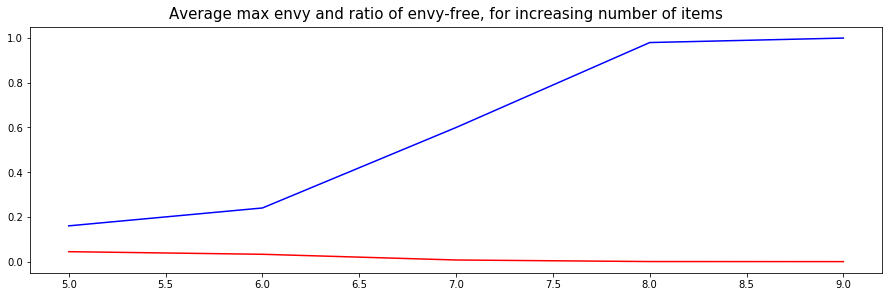

In [48]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize
import networkx as nx
import pylab
figsize(12.5, 4)
p = np.linspace(tested_resources[0], tested_resources[0]+len(tested_resources)-1,len(tested_resources))
#print(p)
plt.plot(p, max_envy[0], color='red')
plt.plot(p, ratio_ef[0], color = 'blue')
legende = "Average max envy and ratio of envy-free, for increasing number of items"
plt.suptitle(legende, y=1.02, fontsize=15)
plt.tight_layout()

### Question 3
Play a little bit with these simulations and try to determine:
* for 2 agents, how the max envy evolves, from which number of items
you can be reasonably sure to get an envy-free allocation
* same question for 5 agents

In [49]:
tested_resources = list(range(1,20))
tested_agents = [3]
max_envy,ratio_ef = simulations.simulationOpt(50,tested_agents,tested_resources,'normalized')
#print (max_envy,ratio_ef)
print("Experiments completed!")

d:\users\maria\appdata\local\programs\python\python37-32\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Experiments completed!


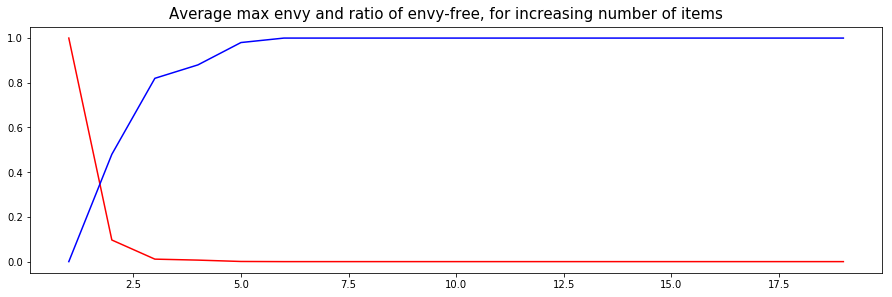

In [50]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize
import networkx as nx
import pylab
figsize(12.5, 4)
p = np.linspace(tested_resources[0], tested_resources[0]+len(tested_resources)-1,len(tested_resources))
#print(p)
plt.plot(p, max_envy[0], color='red', label="max envy")
plt.plot(p, ratio_ef[0], color = 'blue', label="EF ratio")
legende = "Average max envy and ratio of envy-free, for increasing number of items"
plt.suptitle(legende, y=1.02, fontsize=15)
plt.tight_layout()

Pour 2 agents, l'allocation est envy-free à partir de 5 objets. Pour un problème à 1 objet, l'envie max est toujours supérieure à 0 puisque les agents ne peuvent pas se partager l'unique objet.

In [51]:
tested_resources = list(range(1,15))
tested_agents = [6]
max_envy,ratio_ef = simulations.simulationOpt(50,tested_agents,tested_resources,'normalized')
#print (max_envy,ratio_ef)
print("Experiments completed!")

Experiments completed!


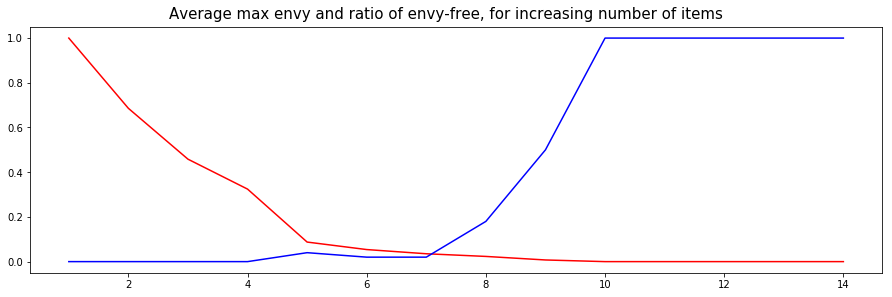

In [52]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize
import networkx as nx
import pylab
figsize(12.5, 4)
p = np.linspace(tested_resources[0], tested_resources[0]+len(tested_resources)-1,len(tested_resources))
#print(p)
plt.plot(p, max_envy[0], color='red', label="max envy")
plt.plot(p, ratio_ef[0], color = 'blue', label="EF ratio")
legende = "Average max envy and ratio of envy-free, for increasing number of items"
plt.suptitle(legende, y=1.02, fontsize=15)
plt.tight_layout()

Pour 5 agents, l'allocation est envy-free à partir de 10 objets.

## 5. Envy-Freeness on Graph (Facultatif)

Agents can only envy their neighbours in the visibility (Idea: you can't envy someone you don't see). 

Augment the code of mipsolving so as to account for graph envy-freeness, ie. an envy is only considered among agents which are neighbours in the graph. Then, test how likely it is to get a graph-envy free allocation:
* on a line of 10 agents, with Borda utilities,
* on a star of 10 agents, with Borda utilities.